In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report


In [7]:
from sklearn.preprocessing import LabelEncoder


In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold


In [17]:
!pip install xgboost


  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [21]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [29]:
df = pd.read_csv("C:/Users/Kartik/Downloads/Iris.csv")

In [31]:

# Dataset First Look
# View top 5 rows of the dataset
df.head()
     

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  6


In [35]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [37]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')
     

number of duplicated rows are 0


In [39]:
# Missing Values/Null Values Count
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [41]:
# Dataset Columns
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [43]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)
     

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.50,5.84,3.05,3.76,1.20,NaN
std,43.45,0.83,0.43,1.76,0.76,NaN
min,1.00,4.30,2.00,1.00,0.10,NaN
25%,38.25,5.10,2.80,1.60,0.30,NaN
50%,75.50,5.80,3.00,4.35,1.30,NaN
75%,112.75,6.40,3.30,5.10,1.80,NaN


In [45]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Id is 150
No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


In [47]:
# We don't need the 1st column so let's drop that
data=df.iloc[:,1:]
     

In [49]:

# New updated dataset
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


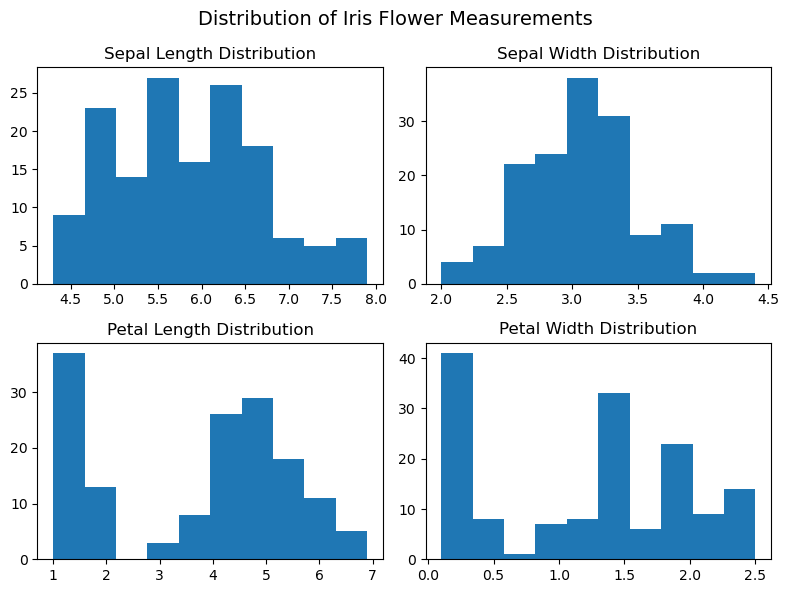

In [51]:
# Chart - 1 Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(data['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(data['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(data['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(data['PetalWidthCm'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()
     


In [53]:
# Define colors for each species and the corresponding species labels.
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
     

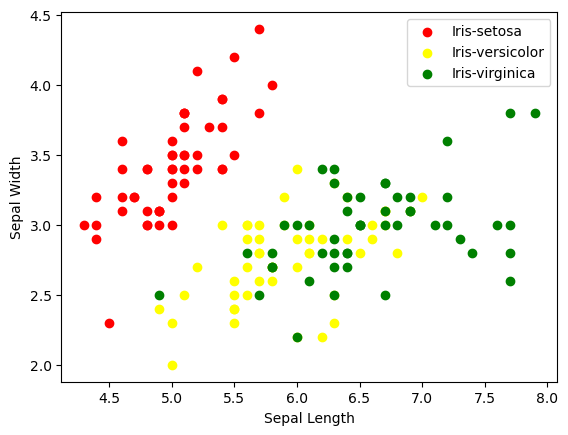

In [55]:
# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.
# Create a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()
     


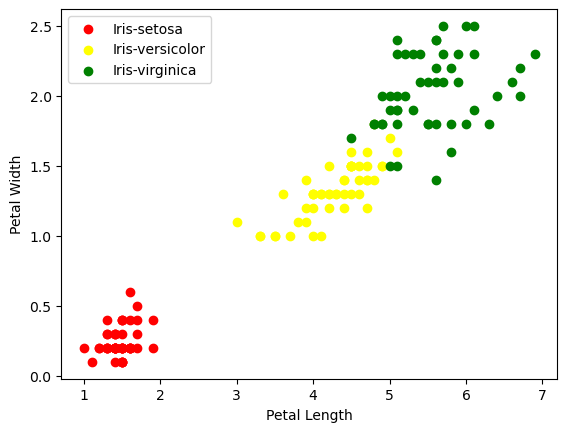

In [57]:
# Chart - 3 Scatter plot visualization code for Petal Length vs Petal Width.
# Create a scatter plot for Petal Length vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

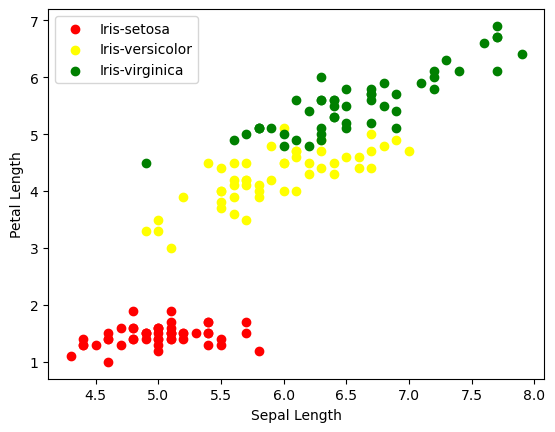

In [59]:
# Chart - 4 Scatter plot visualization code for Sepal Length vs Petal Length.
# Create a scatter plot for Sepal Length vs Petal Length for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()
     

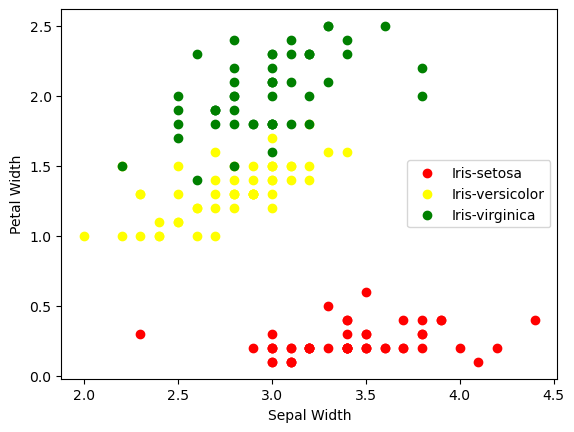

In [61]:
# Chart - 5 Scatter plot visualization code for Sepal Width vs Petal Width.
# Create a scatter plot for Sepal Width vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()
     

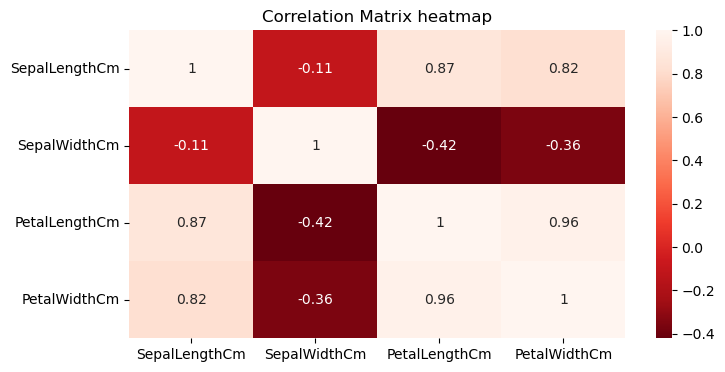

In [65]:
# Correlation Heatmap Visualization Code
corr_matrix = data.corr(numeric_only=True)

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

In [67]:
# Encode the categorical columns
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
data['Species'] = le.fit_transform(data['Species'])

# Check the unique values in the 'Species' column after encoding
unique_species = data['Species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1 2]


In [69]:

# Defining the X and y
x=data.drop(columns=['Species'], axis=1)
y=data['Species']

In [75]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [77]:
y_train.value_counts()

Species
2    36
0    35
1    34
Name: count, dtype: int64

In [79]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score
     

# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])
     

In [81]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


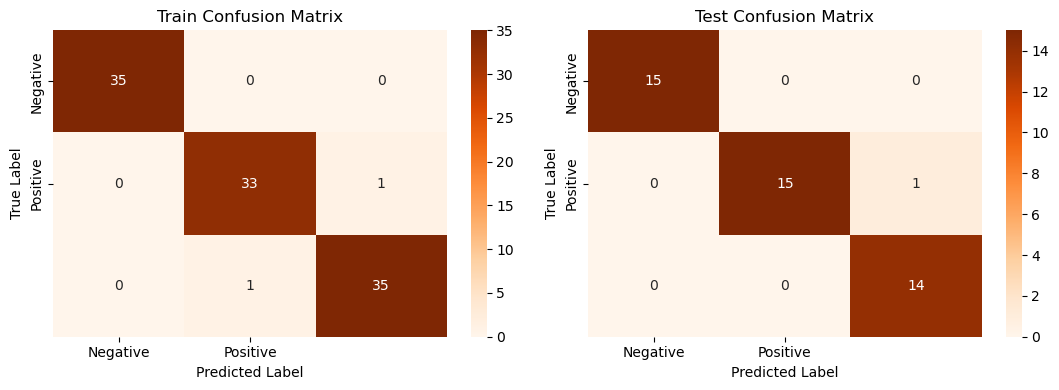


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.970588 | 0.970588 |   0.970588 |  34        |
| 2            |    0.972222 | 0.972222 |   0.972222 |  36        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.980937 | 0.980937 |   0.980937 | 105        |
| weighted avg |    0.980952 | 0.980952 |   0.980952 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.933333 | 1        |   0.965517 | 14        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [83]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)
     

In [85]:
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score
     

,Logistic regression
Precision Train,0.980952
Precision Test,0.979259
Recall Train,0.980952
Recall Test,0.977778
Accuracy Train,0.980952
Accuracy Test,0.977778
F1 macro Train,0.980952
F1 macro Test,0.977802


In [87]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)
     

Best hyperparameters:  {'C': 100, 'penalty': 'l1', 'solver': 'saga'}


In [89]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)
     


Confusion Matrix:


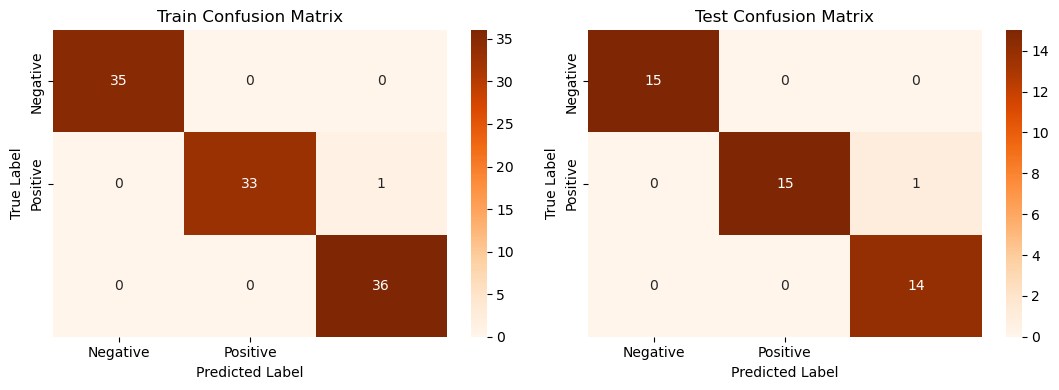


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.970588 |   0.985075 |  34        |
| 2            |    0.972973 | 1        |   0.986301 |  36        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.990991 | 0.990196 |   0.990459 | 105        |
| weighted avg |    0.990734 | 0.990476 |   0.99047  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.933333 | 1        |   0.965517 | 14        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [91]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [93]:

score['Logistic regression tuned'] = lr_score2

In [95]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned
Precision Train,0.980952,0.990734
Precision Test,0.979259,0.979259
Recall Train,0.980952,0.990476
Recall Test,0.977778,0.977778
Accuracy Train,0.980952,0.990476
Accuracy Test,0.977778,0.977778
F1 macro Train,0.980952,0.990470
F1 macro Test,0.977802,0.977802


In [97]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned
Precision Train,0.980952,0.990734
Precision Test,0.979259,0.979259
Recall Train,0.980952,0.990476
Recall Test,0.977778,0.977778
Accuracy Train,0.980952,0.990476
Accuracy Test,0.977778,0.977778
F1 macro Train,0.980952,0.990470
F1 macro Test,0.977802,0.977802


In [101]:
# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)

# Model is trained (fit) and predicted in the evaluate model
     


Confusion Matrix:


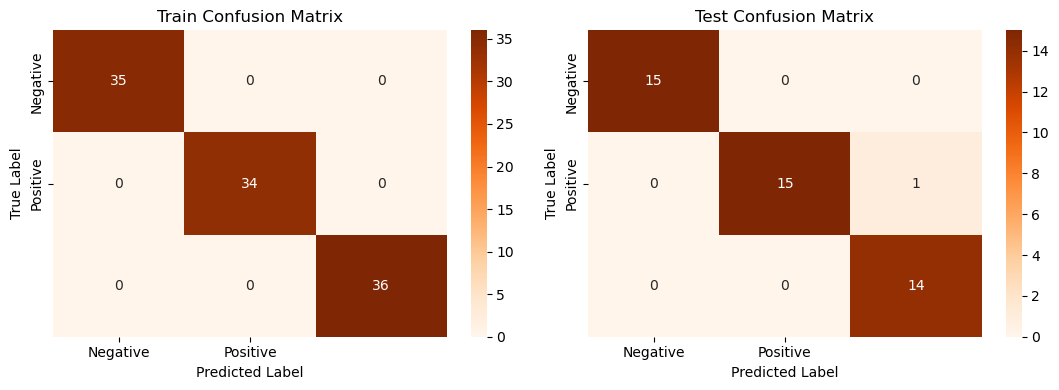


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        34 |
| 2            |           1 |        1 |          1 |        36 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.933333 | 1        |   0.965517 | 14        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.977778 |
| m

In [103]:

# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [105]:
# Updated Evaluation metric Score Chart
score['Decision Tree'] = dt_score
score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.980952,0.990734,1.000000
Precision Test,0.979259,0.979259,0.979259
Recall Train,0.980952,0.990476,1.000000
Recall Test,0.977778,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000
Accuracy Test,0.977778,0.977778,0.977778
F1 macro Train,0.980952,0.990470,1.000000
F1 macro Test,0.977802,0.977802,0.977802


In [107]:

# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [109]:

# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Confusion Matrix:


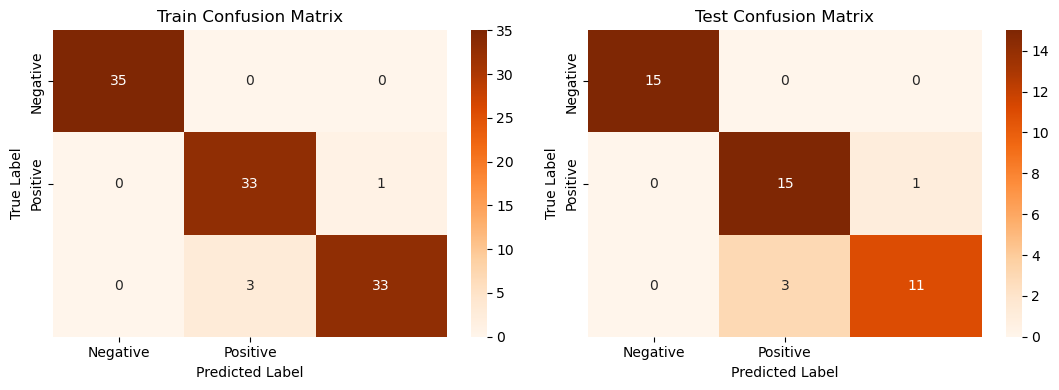


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.916667 | 0.970588 |   0.942857 |  34        |
| 2            |    0.970588 | 0.916667 |   0.942857 |  36        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.962418 | 0.962418 |   0.961905 | 105        |
| weighted avg |    0.962932 | 0.961905 |   0.961905 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.833333 | 0.9375   |   0.882353 | 16        |
| 2            |    0.916667 | 0.785714 |   0.846154 | 14        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.9111

In [111]:

# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

In [113]:

score['Decision Tree tuned'] = dt2_score
     

In [115]:
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned
Precision Train,0.980952,0.990734,1.000000,0.962932
Precision Test,0.979259,0.979259,0.979259,0.914815
Recall Train,0.980952,0.990476,1.000000,0.961905
Recall Test,0.977778,0.977778,0.977778,0.911111
Accuracy Train,0.980952,0.990476,1.000000,0.961905
Accuracy Test,0.977778,0.977778,0.977778,0.911111
F1 macro Train,0.980952,0.990470,1.000000,0.961905
F1 macro Test,0.977802,0.977802,0.977802,0.910307


In [117]:

# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model
     


Confusion Matrix:


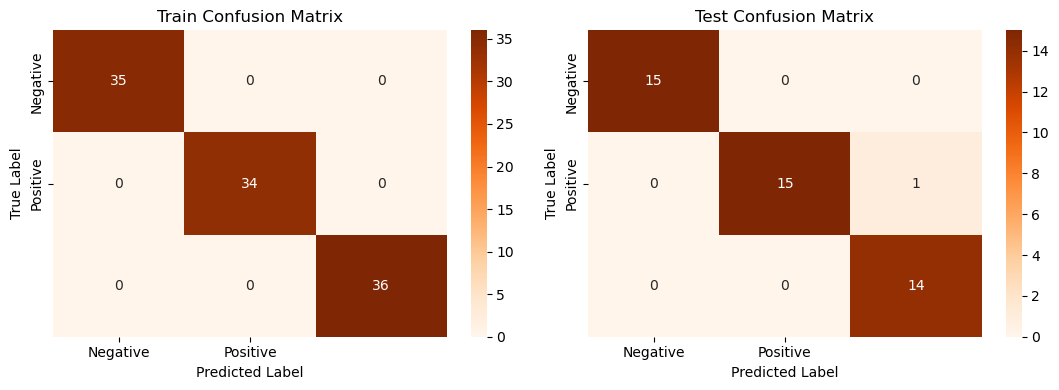


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        34 |
| 2            |           1 |        1 |          1 |        36 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.933333 | 1        |   0.965517 | 14        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.977778 |
| m

In [119]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [121]:

# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score
     

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.980952,0.990734,1.000000,0.962932,1.000000
Precision Test,0.979259,0.979259,0.979259,0.914815,0.979259
Recall Train,0.980952,0.990476,1.000000,0.961905,1.000000
Recall Test,0.977778,0.977778,0.977778,0.911111,0.977778
Accuracy Train,0.980952,0.990476,1.000000,0.961905,1.000000
Accuracy Test,0.977778,0.977778,0.977778,0.911111,0.977778
F1 macro Train,0.980952,0.990470,1.000000,0.961905,1.000000
F1 macro Test,0.977802,0.977802,0.977802,0.910307,0.977802


In [123]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)
     

Best hyperparameters:  {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 12}


In [127]:

# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)



Confusion Matrix:


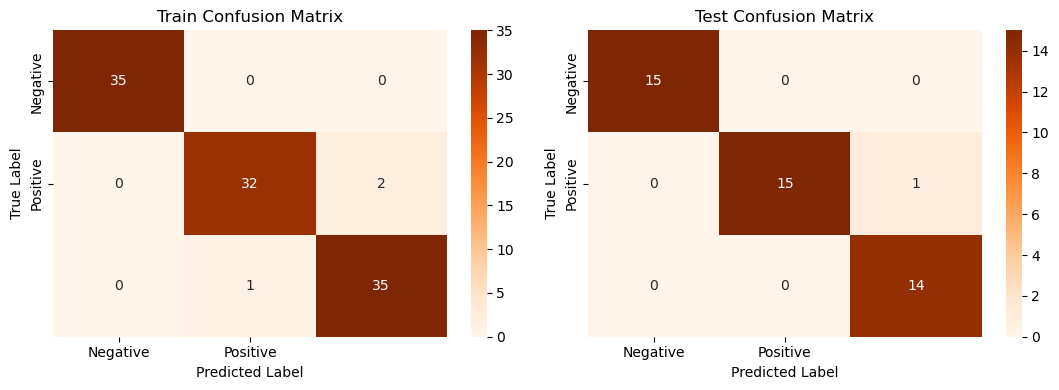


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.969697 | 0.941176 |   0.955224 |  34        |
| 2            |    0.945946 | 0.972222 |   0.958904 |  36        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.971881 | 0.971133 |   0.971376 | 105        |
| weighted avg |    0.971655 | 0.971429 |   0.971411 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.933333 | 1        |   0.965517 | 14        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [129]:

# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

In [131]:
score['Random Forest tuned'] = rf2_score

In [133]:
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned
Precision Train,0.980952,0.990734,1.000000,0.962932,1.000000,0.971655
Precision Test,0.979259,0.979259,0.979259,0.914815,0.979259,0.979259
Recall Train,0.980952,0.990476,1.000000,0.961905,1.000000,0.971429
Recall Test,0.977778,0.977778,0.977778,0.911111,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000,0.961905,1.000000,0.971429
Accuracy Test,0.977778,0.977778,0.977778,0.911111,0.977778,0.977778
F1 macro Train,0.980952,0.990470,1.000000,0.961905,1.000000,0.971411
F1 macro Test,0.977802,0.977802,0.977802,0.910307,0.977802,0.977802


In [135]:

# ML Model - 4 Implementation
svm_model = SVC(kernel='linear', random_state=0, probability=True)

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


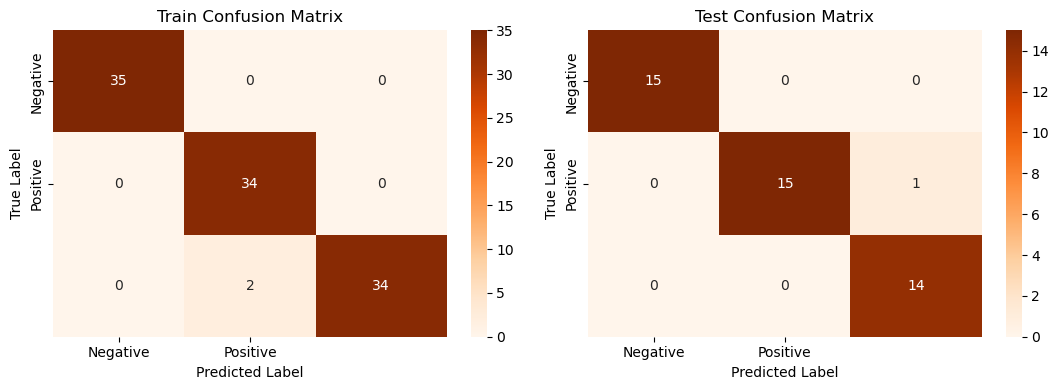


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.944444 | 1        |   0.971429 |  34        |
| 2            |    1        | 0.944444 |   0.971429 |  36        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.981481 | 0.981481 |   0.980952 | 105        |
| weighted avg |    0.982011 | 0.980952 |   0.980952 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.933333 | 1        |   0.965517 | 14        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [137]:

# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)

In [139]:

# Updated Evaluation metric Score Chart
score['SVM'] = svm_score
score
     

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM
Precision Train,0.980952,0.990734,1.000000,0.962932,1.000000,0.971655,0.982011
Precision Test,0.979259,0.979259,0.979259,0.914815,0.979259,0.979259,0.979259
Recall Train,0.980952,0.990476,1.000000,0.961905,1.000000,0.971429,0.980952
Recall Test,0.977778,0.977778,0.977778,0.911111,0.977778,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000,0.961905,1.000000,0.971429,0.980952
Accuracy Test,0.977778,0.977778,0.977778,0.911111,0.977778,0.977778,0.977778
F1 macro Train,0.980952,0.990470,1.000000,0.961905,1.000000,0.971411,0.980952
F1 macro Test,0.977802,0.977802,0.977802,0.910307,0.977802,0.977802,0.977802


In [141]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_

In [143]:

# Initialize model with best parameters
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Confusion Matrix:


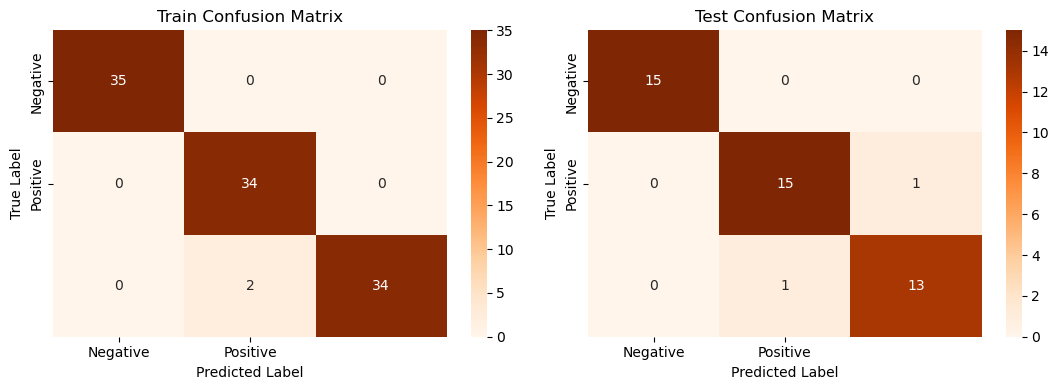


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.944444 | 1        |   0.971429 |  34        |
| 2            |    1        | 0.944444 |   0.971429 |  36        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.981481 | 0.981481 |   0.980952 | 105        |
| weighted avg |    0.982011 | 0.980952 |   0.980952 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.9375   | 0.9375   |   0.9375   | 16        |
| 2            |    0.928571 | 0.928571 |   0.928571 | 14        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [145]:
# Visualizing evaluation Metric Score chart
svm2_score = evaluate_model(svm_model2, x_train, x_test, y_train, y_test)

In [147]:
score['SVM tuned'] = svm2_score
     

In [149]:

# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned
Precision Train,0.980952,0.990734,1.000000,0.962932,1.000000,0.971655,0.982011,0.982011
Precision Test,0.979259,0.979259,0.979259,0.914815,0.979259,0.979259,0.979259,0.955556
Recall Train,0.980952,0.990476,1.000000,0.961905,1.000000,0.971429,0.980952,0.980952
Recall Test,0.977778,0.977778,0.977778,0.911111,0.977778,0.977778,0.977778,0.955556
Accuracy Train,0.980952,0.990476,1.000000,0.961905,1.000000,0.971429,0.980952,0.980952
Accuracy Test,0.977778,0.977778,0.977778,0.911111,0.977778,0.977778,0.977778,0.955556
F1 macro Train,0.980952,0.990470,1.000000,0.961905,1.000000,0.971411,0.980952,0.980952
F1 macro Test,0.977802,0.977802,0.977802,0.910307,0.977802,0.977802,0.977802,0.955556


In [151]:

# ML Model - 5 Implementation
xgb_model = xgb.XGBClassifier()

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


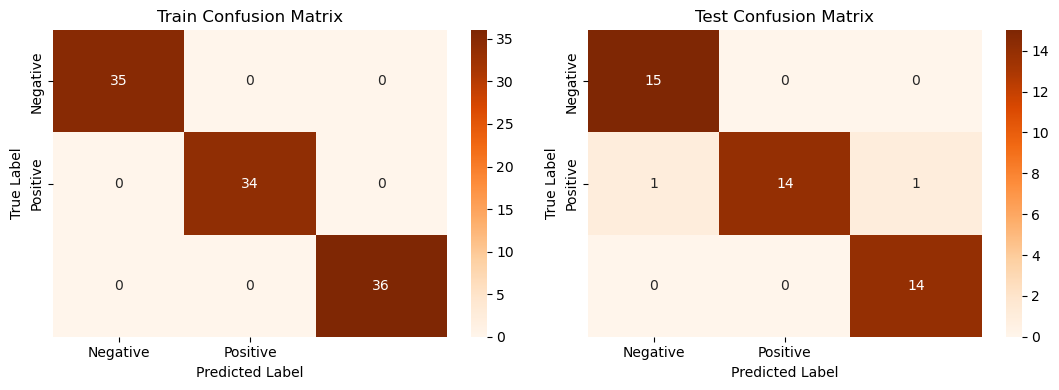


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        34 |
| 2            |           1 |        1 |          1 |        36 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.9375   | 1        |   0.967742 | 15        |
| 1            |    1        | 0.875    |   0.933333 | 16        |
| 2            |    0.933333 | 1        |   0.965517 | 14        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [153]:

# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, x_train, x_test, y_train, y_test)

In [155]:
# Updated Evaluation metric Score Chart
score['XGB'] = xgb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB
Precision Train,0.980952,0.990734,1.000000,0.962932,1.000000,0.971655,0.982011,0.982011,1.000000
Precision Test,0.979259,0.979259,0.979259,0.914815,0.979259,0.979259,0.979259,0.955556,0.958426
Recall Train,0.980952,0.990476,1.000000,0.961905,1.000000,0.971429,0.980952,0.980952,1.000000
Recall Test,0.977778,0.977778,0.977778,0.911111,0.977778,0.977778,0.977778,0.955556,0.955556
Accuracy Train,0.980952,0.990476,1.000000,0.961905,1.000000,0.971429,0.980952,0.980952,1.000000
Accuracy Test,0.977778,0.977778,0.977778,0.911111,0.977778,0.977778,0.977778,0.955556,0.955556
F1 macro Train,0.980952,0.990470,1.000000,0.961905,1.000000,0.971411,0.980952,0.980952,1.000000
F1 macro Test,0.977802,0.977802,0.977802,0.910307,0.977802,0.977802,0.977802,0.955556,0.954816


In [157]:

# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2 = xgb.XGBClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_

In [161]:

# Initialize model with best parameters
xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


Confusion Matrix:


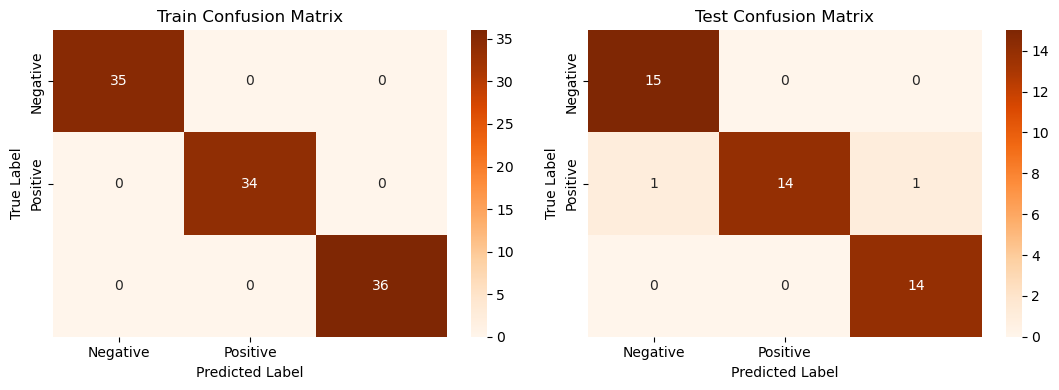


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        34 |
| 2            |           1 |        1 |          1 |        36 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.9375   | 1        |   0.967742 | 15        |
| 1            |    1        | 0.875    |   0.933333 | 16        |
| 2            |    0.933333 | 1        |   0.965517 | 14        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [163]:

# Visualizing evaluation Metric Score chart
xgb2_score = evaluate_model(xgb_model2, x_train, x_test, y_train, y_test)

In [165]:
score['XGB tuned'] = xgb2_score

In [167]:
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned
Precision Train,0.980952,0.990734,1.000000,0.962932,1.000000,0.971655,0.982011,0.982011,1.000000,1.000000
Precision Test,0.979259,0.979259,0.979259,0.914815,0.979259,0.979259,0.979259,0.955556,0.958426,0.958426
Recall Train,0.980952,0.990476,1.000000,0.961905,1.000000,0.971429,0.980952,0.980952,1.000000,1.000000
Recall Test,0.977778,0.977778,0.977778,0.911111,0.977778,0.977778,0.977778,0.955556,0.955556,0.955556
Accuracy Train,0.980952,0.990476,1.000000,0.961905,1.000000,0.971429,0.980952,0.980952,1.000000,1.000000
Accuracy Test,0.977778,0.977778,0.977778,0.911111,0.977778,0.977778,0.977778,0.955556,0.955556,0.955556
F1 macro Train,0.980952,0.990470,1.000000,0.961905,1.000000,0.971411,0.980952,0.980952,1.000000,1.000000
F1 macro Test,0.977802,0.977802,0.977802,0.910307,0.977802,0.977802,0.977802,0.955556,0.954816,0.954816


In [169]:

# ML Model - 6 Implementation
nb_model = GaussianNB()

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


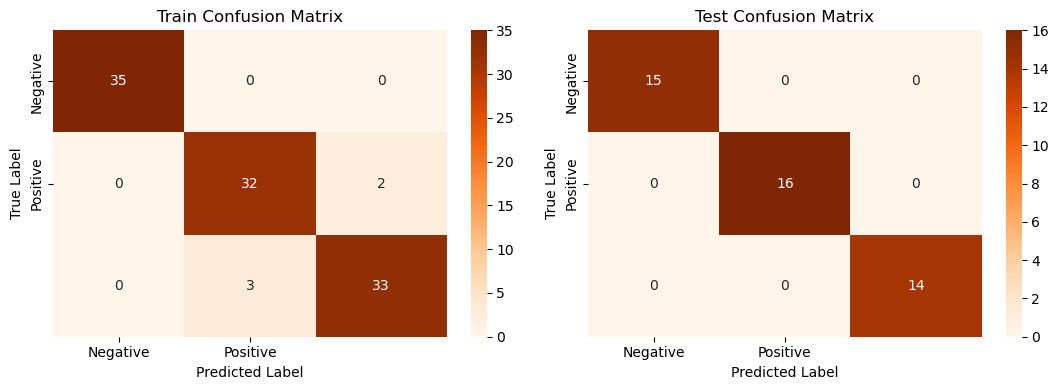


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.914286 | 0.941176 |   0.927536 |  34        |
| 2            |    0.942857 | 0.916667 |   0.929577 |  36        |
| accuracy     |    0.952381 | 0.952381 |   0.952381 |   0.952381 |
| macro avg    |    0.952381 | 0.952614 |   0.952371 | 105        |
| weighted avg |    0.952653 | 0.952381 |   0.952391 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        15 |
| 1            |           1 |        1 |          1 |        16 |
| 2            |           1 |        1 |          1 |        14 |
| accuracy     |           1 |        1 |          1 |        

In [171]:

# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)

In [173]:

# Updated Evaluation metric Score Chart
score['Naive Bayes'] = nb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes
Precision Train,0.980952,0.990734,1.000000,0.962932,1.000000,0.971655,0.982011,0.982011,1.000000,1.000000,0.952653
Precision Test,0.979259,0.979259,0.979259,0.914815,0.979259,0.979259,0.979259,0.955556,0.958426,0.958426,1.000000
Recall Train,0.980952,0.990476,1.000000,0.961905,1.000000,0.971429,0.980952,0.980952,1.000000,1.000000,0.952381
Recall Test,0.977778,0.977778,0.977778,0.911111,0.977778,0.977778,0.977778,0.955556,0.955556,0.955556,1.000000
Accuracy Train,0.980952,0.990476,1.000000,0.961905,1.000000,0.971429,0.980952,0.980952,1.000000,1.000000,0.952381
Accuracy Test,0.977778,0.977778,0.977778,0.911111,0.977778,0.977778,0.977778,0.955556,0.955556,0.955556,1.000000
F1 macro Train,0.980952,0.990470,1.000000,0.961905,1.000000,0.971411,0.980952,0.980952,1.000000,1.000000,0.952391
F1 macro Test,0.977802,0.977802,0.977802,0.910307,0.977802,0.977802,0.977802,0.955556,0.954816,0.954816,1.000000


In [177]:


# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(x_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': 0.012328467394420659}


In [179]:
# Initiate model with best parameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Confusion Matrix:


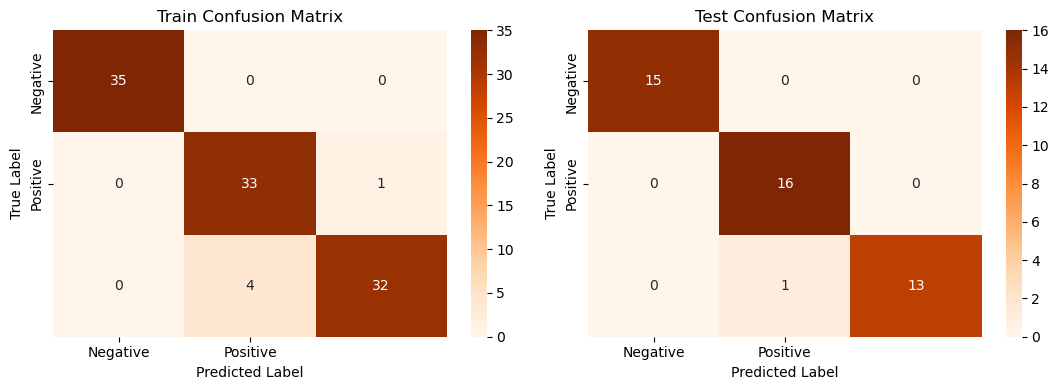


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.891892 | 0.970588 |   0.929577 |  34        |
| 2            |    0.969697 | 0.888889 |   0.927536 |  36        |
| accuracy     |    0.952381 | 0.952381 |   0.952381 |   0.952381 |
| macro avg    |    0.953863 | 0.953159 |   0.952371 | 105        |
| weighted avg |    0.954604 | 0.952381 |   0.952352 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.941176 | 1        |   0.969697 | 16        |
| 2            |    1        | 0.928571 |   0.962963 | 14        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [181]:

# Visualizing evaluation Metric Score chart
nb2_score = evaluate_model(nb_model2, x_train, x_test, y_train, y_test)

In [183]:

score['Naive Bayes tuned']= nb2_score

In [185]:
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned
Precision Train,0.980952,0.990734,1.000000,0.962932,1.000000,0.971655,0.982011,0.982011,1.000000,1.000000,0.952653,0.954604
Precision Test,0.979259,0.979259,0.979259,0.914815,0.979259,0.979259,0.979259,0.955556,0.958426,0.958426,1.000000,0.979085
Recall Train,0.980952,0.990476,1.000000,0.961905,1.000000,0.971429,0.980952,0.980952,1.000000,1.000000,0.952381,0.952381
Recall Test,0.977778,0.977778,0.977778,0.911111,0.977778,0.977778,0.977778,0.955556,0.955556,0.955556,1.000000,0.977778
Accuracy Train,0.980952,0.990476,1.000000,0.961905,1.000000,0.971429,0.980952,0.980952,1.000000,1.000000,0.952381,0.952381
Accuracy Test,0.977778,0.977778,0.977778,0.911111,0.977778,0.977778,0.977778,0.955556,0.955556,0.955556,1.000000,0.977778
F1 macro Train,0.980952,0.990470,1.000000,0.961905,1.000000,0.971411,0.980952,0.980952,1.000000,1.000000,0.952391,0.952352
F1 macro Test,0.977802,0.977802,0.977802,0.910307,0.977802,0.977802,0.977802,0.955556,0.954816,0.954816,1.000000,0.977703


In [187]:
# ML Model - 7 Implementation
nn_model = MLPClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


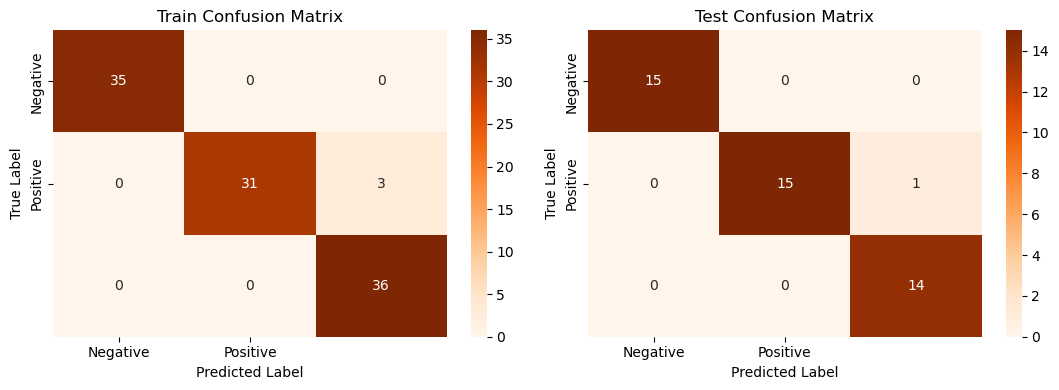


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.911765 |   0.953846 |  34        |
| 2            |    0.923077 | 1        |   0.96     |  36        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.974359 | 0.970588 |   0.971282 | 105        |
| weighted avg |    0.973626 | 0.971429 |   0.971341 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.933333 | 1        |   0.965517 | 14        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [189]:

# Visualizing evaluation Metric Score chart
neural_score = evaluate_model(nn_model, x_train, x_test, y_train, y_test)

In [191]:

# Updated Evaluation metric Score Chart
score['Neural Network'] = neural_score
score
     

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network
Precision Train,0.980952,0.990734,1.000000,0.962932,1.000000,0.971655,0.982011,0.982011,1.000000,1.000000,0.952653,0.954604,0.973626
Precision Test,0.979259,0.979259,0.979259,0.914815,0.979259,0.979259,0.979259,0.955556,0.958426,0.958426,1.000000,0.979085,0.979259
Recall Train,0.980952,0.990476,1.000000,0.961905,1.000000,0.971429,0.980952,0.980952,1.000000,1.000000,0.952381,0.952381,0.971429
Recall Test,0.977778,0.977778,0.977778,0.911111,0.977778,0.977778,0.977778,0.955556,0.955556,0.955556,1.000000,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000,0.961905,1.000000,0.971429,0.980952,0.980952,1.000000,1.000000,0.952381,0.952381,0.971429
Accuracy Test,0.977778,0.977778,0.977778,0.911111,0.977778,0.977778,0.977778,0.955556,0.955556,0.955556,1.000000,0.977778,0.977778
F1 macro Train,0.980952,0.990470,1.000000,0.961905,1.000000,0.971411,0.980952,0.980952,1.000000,1.000000,0.952391,0.952352,0.971341
F1 macro Test,0.977802,0.977802,0.977802,0.910307,0.977802,0.977802,0.977802,0.955556,0.954816,0.954816,1.000000,0.977703,0.977802


In [193]:
# ML Model - 7 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

# Initialize the model
neural = MLPClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'hidden_layer_sizes': 80, 'alpha': 0.0032}


In [195]:

# Initiate model with best parameters
nn_model2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)
     


Confusion Matrix:


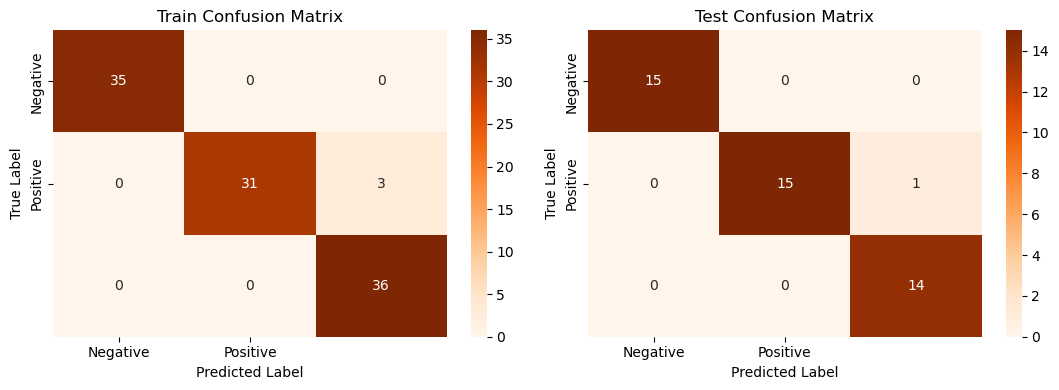


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.911765 |   0.953846 |  34        |
| 2            |    0.923077 | 1        |   0.96     |  36        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.974359 | 0.970588 |   0.971282 | 105        |
| weighted avg |    0.973626 | 0.971429 |   0.971341 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.933333 | 1        |   0.965517 | 14        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [197]:

# Visualizing evaluation Metric Score chart
neural2_score = evaluate_model(nn_model2, x_train, x_test, y_train, y_test)

In [199]:

score['Neural Network tuned']= neural2_score

In [201]:
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network,Neural Network tuned
Precision Train,0.980952,0.990734,1.000000,0.962932,1.000000,0.971655,0.982011,0.982011,1.000000,1.000000,0.952653,0.954604,0.973626,0.973626
Precision Test,0.979259,0.979259,0.979259,0.914815,0.979259,0.979259,0.979259,0.955556,0.958426,0.958426,1.000000,0.979085,0.979259,0.979259
Recall Train,0.980952,0.990476,1.000000,0.961905,1.000000,0.971429,0.980952,0.980952,1.000000,1.000000,0.952381,0.952381,0.971429,0.971429
Recall Test,0.977778,0.977778,0.977778,0.911111,0.977778,0.977778,0.977778,0.955556,0.955556,0.955556,1.000000,0.977778,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000,0.961905,1.000000,0.971429,0.980952,0.980952,1.000000,1.000000,0.952381,0.952381,0.971429,0.971429
Accuracy Test,0.977778,0.977778,0.977778,0.911111,0.977778,0.977778,0.977778,0.955556,0.955556,0.955556,1.000000,0.977778,0.977778,0.977778
F1 macro Train,0.980952,0.990470,1.000000,0.961905,1.000000,0.971411,0.980952,0.980952,1.000000,1.000000,0.952391,0.952352,0.971341,0.971341
F1 macro Test,0.977802,0.977802,0.977802,0.910307,0.977802,0.977802,0.977802,0.955556,0.954816,0.954816,1.000000,0.977703,0.977802,0.977802


In [203]:

print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |      SVM |   SVM tuned |      XGB |   XGB tuned |   Naive Bayes |   Naive Bayes tuned |   Neural Network |   Neural Network tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|------------:|---------:|------------:|--------------:|--------------------:|-----------------:|-----------------------:|
| Precision Train |              0.980952 |                    0.990734 |        1        |              0.962932 |        1        |              0.971655 | 0.982011 |    0.982011 | 1        |    1        |      0.952653 |            0.954604 |         0.973626 |               0.973626 |
| Precision Test  |              0.979259 |                    0.979259 |        0.979259 |              0.914815 |        0.97925

In [205]:

# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj
     

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Decision Tree tuned,0.962932,0.914815,0.961905,0.911111,0.961905,0.911111,0.961905,0.910307
Random Forest tuned,0.971655,0.979259,0.971429,0.977778,0.971429,0.977778,0.971411,0.977802
Naive Bayes,0.952653,1.000000,0.952381,1.000000,0.952381,1.000000,0.952391,1.000000
Naive Bayes tuned,0.954604,0.979085,0.952381,0.977778,0.952381,0.977778,0.952352,0.977703
Neural Network,0.973626,0.979259,0.971429,0.977778,0.971429,0.977778,0.971341,0.977802
Neural Network tuned,0.973626,0.979259,0.971429,0.977778,0.971429,0.977778,0.971341,0.977802


In [215]:

def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [219]:

metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Naive Bayes - 1.0
Recall: Naive Bayes - 1.0
Accuracy: Naive Bayes - 1.0
F1 macro: Naive Bayes - 1.0


In [221]:

# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model   |   Recall Train |   Recall Test |
|:-----------------------|---------------:|--------------:|
| Decision Tree tuned    |       0.961905 |      0.911111 |
| Random Forest tuned    |       0.971429 |      0.977778 |
| Naive Bayes            |       0.952381 |      1        |
| Naive Bayes tuned      |       0.952381 |      0.977778 |
| Neural Network         |       0.971429 |      0.977778 |
| Neural Network tuned   |       0.971429 |      0.977778 |
